### Diabetes Linear Regression #01

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# Linear Regression
  mae  = 51.341
  rmse = 62.621
  r2   = 0.231


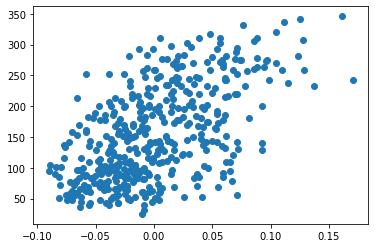

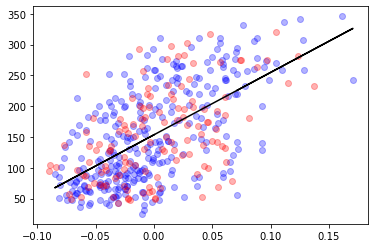

In [10]:
# Linear Regression을 위한 라이브러리 로드
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 당뇨병 데이터셋 로드
diabetes = load_diabetes()

# 당뇨병 데이터셋을 df_diabetes 이름의 DataFrame으로 변환
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target
display(df_diabetes)

# 당뇨병 데이터 중 bmi와 target 간의 관계를 시각화
x_sample = df_diabetes[['bmi']]
y_sample = df_diabetes['target'].values

fig, ax = plt.subplots()
ax.scatter(x_sample, y_sample)
fig.savefig('./data/diabete1.png')

# bmi 데이터와 target을 Linear Regression으로 학습
X_trn, X_test, y_trn, y_test = train_test_split(x_sample, y_sample.reshape(-1, 1), test_size=0.3, random_state=0)
clf = LinearRegression()
clf.fit(X_trn, y_trn)
y_pred = clf.predict(X_test)

# coef_ : 기울기
# intercept_ : 절편
new_x = X_trn.values.flatten()
new_y = X_trn.values.flatten() * clf.coef_[0] + clf.intercept_

fig, ax = plt.subplots()
ax.scatter(X_trn, y_trn, c="b", alpha=0.3)
ax.scatter(X_test, y_test, c="r", alpha=0.3)
ax.plot(new_x, new_y, c="k")

# Linear Regression을 MAE, RMSE, R2 score로 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # If True returns MSE value, if False returns RMSE value. (default=True)
r2 = r2_score(y_test, y_pred)
print("# Linear Regression")
print(f"  mae  = {mae:0.3f}")
print(f"  rmse = {rmse:0.3f}")
print(f"  r2   = {r2:0.3f}")